In [1]:
import numpy
speed = [99,86,87,88,111,86,103,87,94,78,77,85,86]

l = len(speed)
print(f"列表中包含{l}个数值")

列表中包含13个数值


In [2]:
import numpy
speed = [99,86,87,88,111,86,103,87,94,78,77,85,86]
x = numpy.mean(speed)
print("均值：",x)


均值： 89.76923076923077


In [ ]:
import numpy
speed = [99,86,87,88,111,86,103,87,94,78,77,85,86]
y = numpy.median(speed)
print("中值:",y)


In [ ]:

from scipy import stats
import numpy
speed = [99,86,87,88,111,86,103,87,94,78,77,85,86]
z = stats.mode(speed)
print("众数：",z)


In [ ]:

import numpy
speed = [99,86,87,88,111,86,103,87,94,78,77,85,86]
var = numpy.var(speed)
print("方差：",var) #列表中各数值与均值差的平方和。σ^2


In [ ]:

import numpy
speed = [99,86,87,88,111,86,103,87,94,78,77,85,86]
std = numpy.std(speed)
print("标准差:",std) #方差的平方根。σ



In [ ]:

import numpy
speed = [99,86,87,88,111,86,103,87,94,78,77,85,86]
per = numpy.percentile(speed,75) #列表中75%的的值小于
print("百分位数",per)


In [ ]:

import matplotlib.pyplot as plt
import numpy

ran = numpy.random.uniform(0.00,5.99,123) #生成随机数组
print("随机数",ran)

n, bins, patches = plt.hist(ran,7) #直方图
plt.show()
# 显示每栏的数值和边界
for i in range(len(n)):
    print(f"第 {i+1} 栏: 区间 [{bins[i]:.2f}, {bins[i+1]:.2f}], 数值 {int(n[i])}")

nor = numpy.random.normal(5.0,1.0,233) #均值为5，标准差为1，数值个数233

In [ ]:

import matplotlib.pyplot as plt
import numpy

nor = numpy.random.normal(5.0,1.0,233) #正态分布：均值为5，标准差为1，数值个数233
plt.hist(nor,100)
plt.show()

In [ ]:
import matplotlib.pyplot as plt

x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]

plt.scatter(x, y) #绘制散点图
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from scipy import stats

x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]

slope, intercept, r, p, std_err = stats.linregress(x, y) #线性回归

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()
print(r)  #输出R方

In [ ]:
import numpy
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

mymodel = numpy.poly1d(numpy.polyfit(x, y, 3)) #建立多项式模型

myline = numpy.linspace(1, 22, 100) #指定行显示方式。1开始，22结束

plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.show()

print(r2_score(y,mymodel(x))) #输出R方

In [ ]:
import pandas
from sklearn import linear_model

# 读取数据
df = pandas.read_csv("cars.csv")
X = df[['Weight', 'Volume']]
y = df['CO2']

# 创建回归模型
regr = linear_model.LinearRegression()
regr.fit(X, y)

# 预测重量为 2300kg、排量为 1300ccm 的汽车的二氧化碳排放量
import pandas as pd
input_data = pd.DataFrame([[2300, 1300]], columns=['Weight', 'Volume'])
predictedCO2 = regr.predict(input_data)

print(regr.coef_) #打印系数
print(predictedCO2)


[0.00755095 0.00780526]
[107.2087328]


In [7]:
import pandas as pd
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler

# 加载数据
df = pd.read_csv("cars2.csv")

# 特征和目标值
X = df[['Weight', 'Volume']]
y = df['CO2']

# 标准化特征
scale = StandardScaler()
scaledX = scale.fit_transform(X)

# 创建并训练模型
regr = linear_model.LinearRegression()
regr.fit(scaledX, y)

# 标准化新的输入数据
new_data = pd.DataFrame([[2300, 1.3]], columns=['Weight', 'Volume'])
scaled_new_data = scale.transform(new_data)

# 预测CO2值
predictedCO2 = regr.predict(scaled_new_data)
print(predictedCO2)


[107.2087328]


In [ ]:
import numpy
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
numpy.random.seed(2)

x = numpy.random.normal(3, 1, 100)
y = numpy.random.normal(150, 40, 100) / x

train_x = x[:80]
train_y = y[:80]

test_x = x[80:]
test_y = y[80:]

mymodel = numpy.poly1d(numpy.polyfit(train_x, train_y, 4))
myline = numpy.linspace(0, 6, 100)

plt.scatter(train_x, train_y)
plt.plot(myline, mymodel(myline))
plt.show()

r2 = r2_score(test_y, mymodel(test_x)) #测试模型，输出R2

print(r2)

In [ ]:
import pandas
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib.image as pltimg

df = pandas.read_csv("shows.csv")

d = {'UK': 0, 'USA': 1, 'N': 2}
df['Nationality'] = df['Nationality'].map(d)
d = {'YES': 1, 'NO': 0}
df['Go'] = df['Go'].map(d)

features = ['Age', 'Experience', 'Rank', 'Nationality']

X = df[features]
y = df['Go']

dtree = DecisionTreeClassifier()
dtree = dtree.fit(X, y)
data = tree.export_graphviz(dtree, out_file=None, feature_names=features,filled=True)
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('mydecisiontree.png')

img=pltimg.imread('mydecisiontree.png')
imgplot = plt.imshow(img)
plt.axis("off")
plt.show()

new_ = pandas.DataFrame([[40, 10, 7, 1]], columns=['Age', 'Experience', 'Rank', 'Nationality'])

print(dtree.predict(new_)) #预测


There are 768 rows and 9 columns


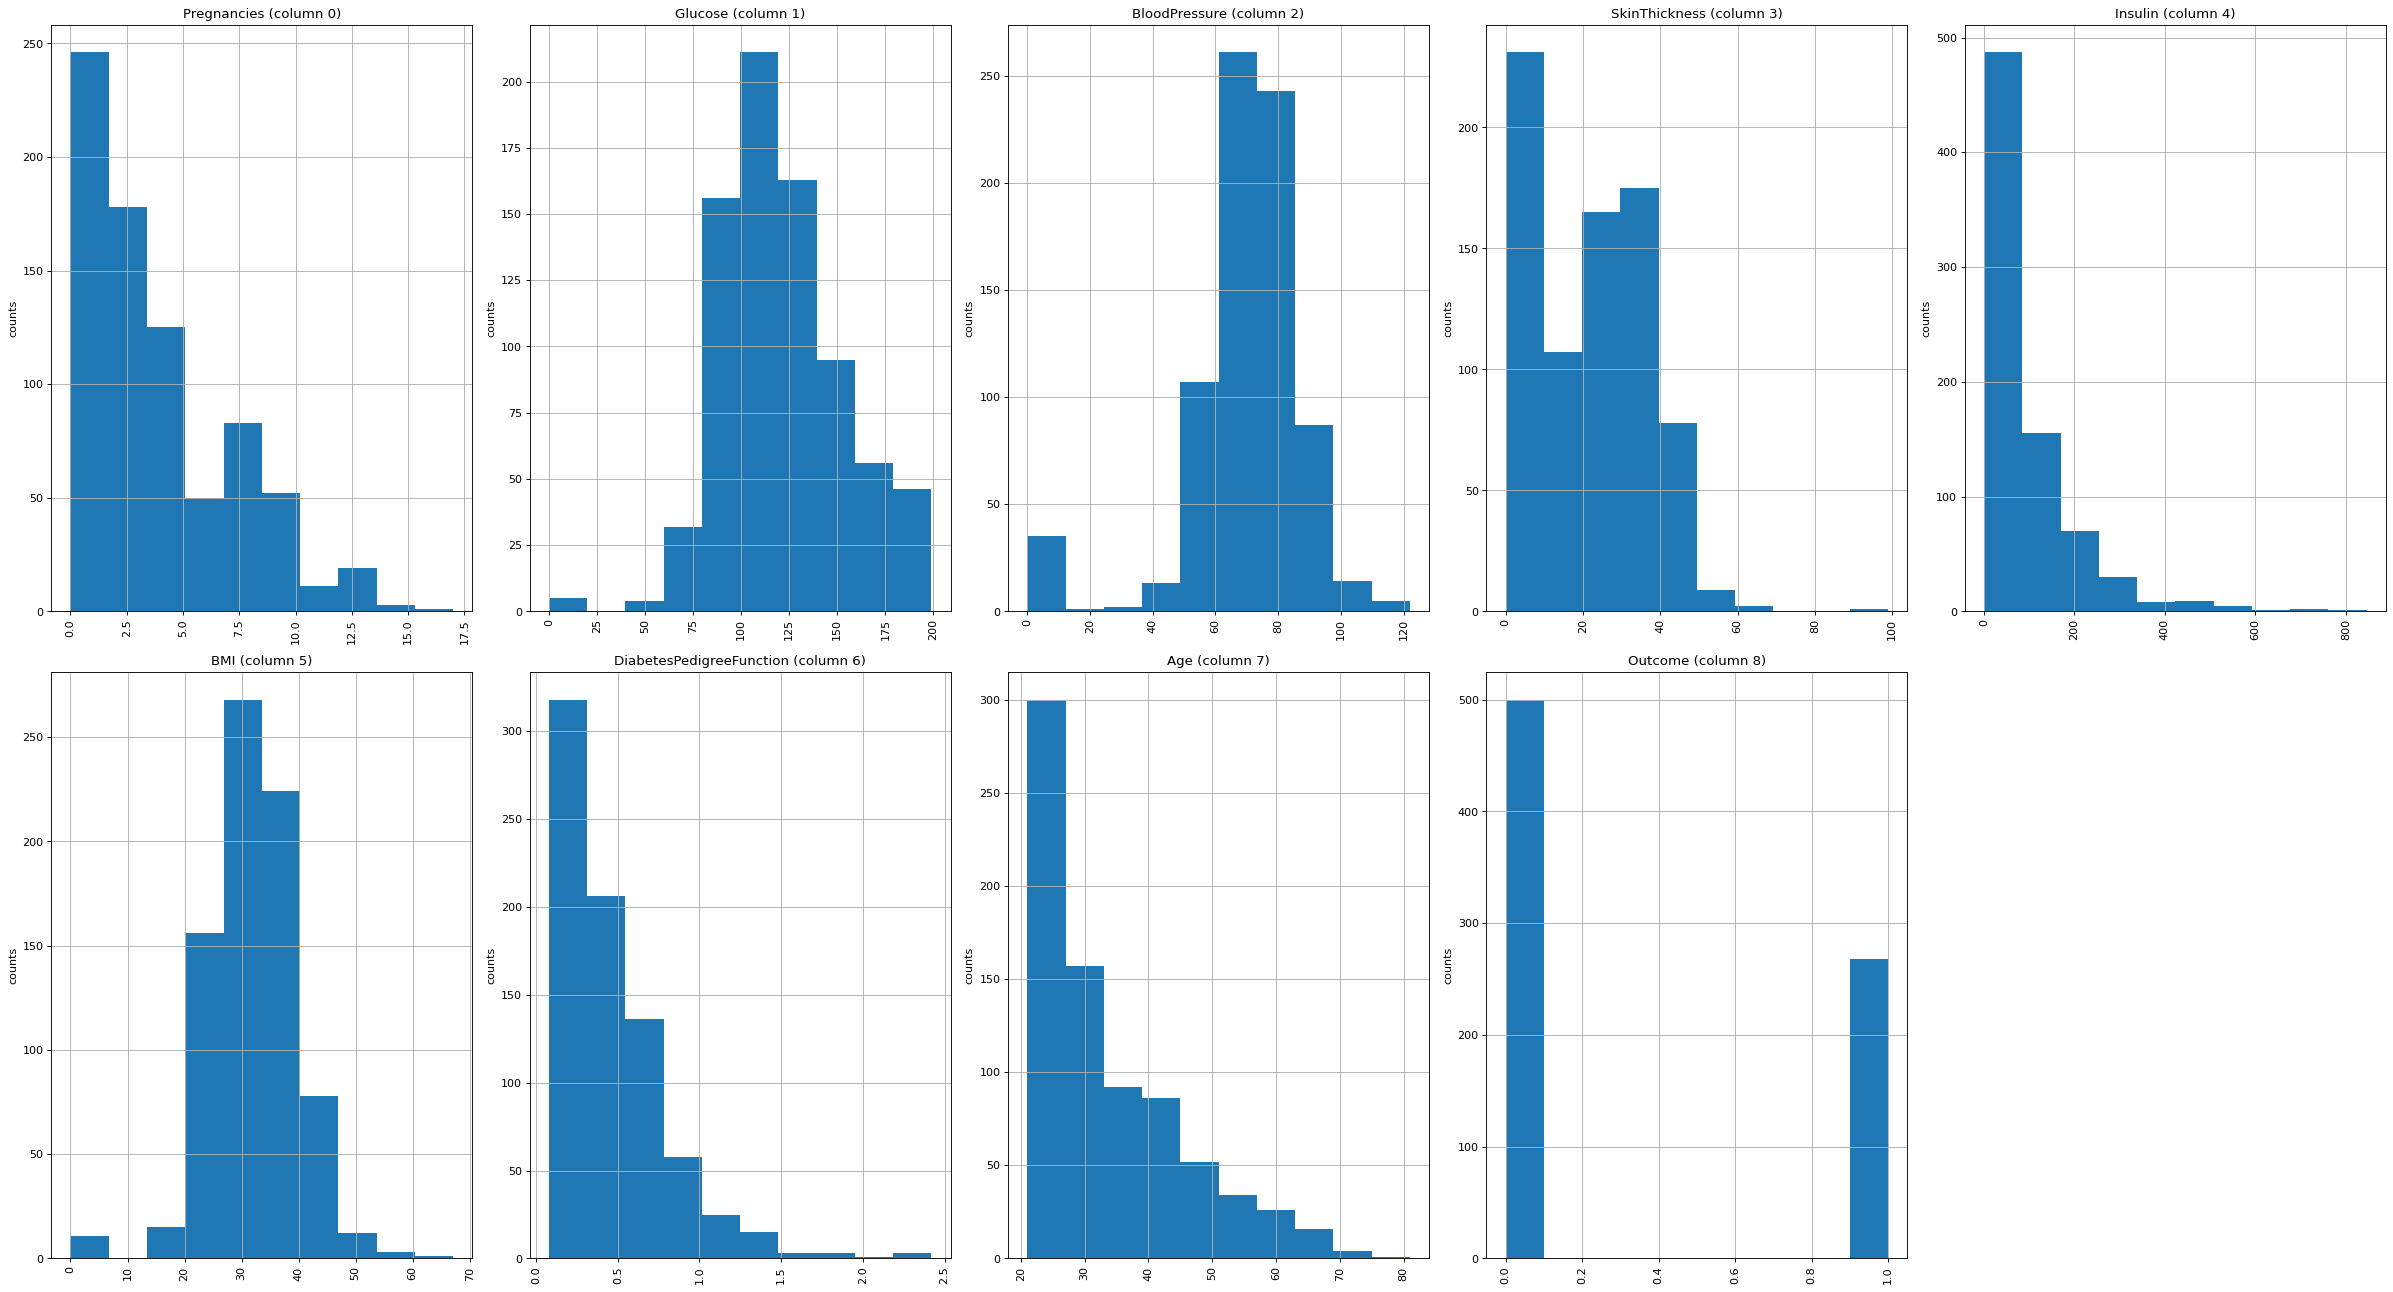

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math

nRowsRead = 1000 # specify 'None' if want to read whole file\
df1 = pd.read_csv('diabetes.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'diabetes.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')
df1.head(5)

# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    # df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = math.ceil((nCol + nGraphPerRow - 1) / nGraphPerRow)

    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

plotPerColumnDistribution(df1,10,5)

There are 768 rows and 9 columns


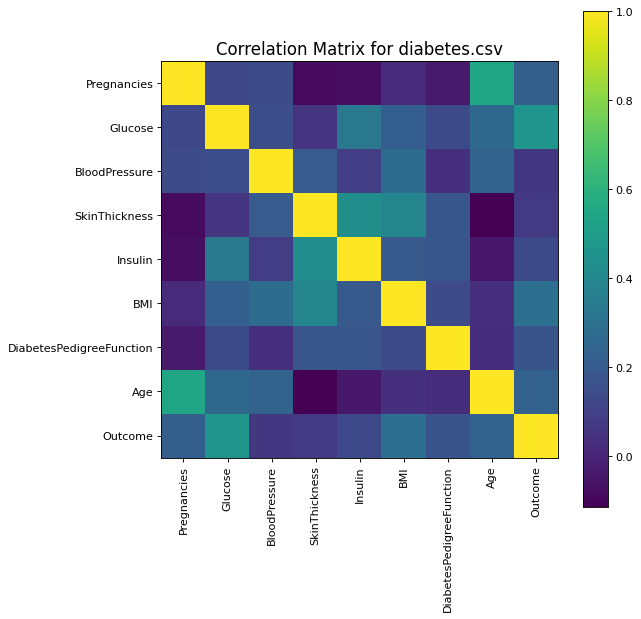

In [2]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math

nRowsRead = 1000 # specify 'None' if want to read whole file\
df1 = pd.read_csv('diabetes.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'diabetes.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')
# df1.head(5)

# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna(axis = 'columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

plotCorrelationMatrix(df1, 8)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math

nRowsRead = 1000 # specify 'None' if want to read whole file\
df1 = pd.read_csv('diabetes.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'diabetes.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')
# df1.head(5)

# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna(axis = 'columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate(' %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

plotScatterMatrix(df1, 20, 10)

In [24]:
#Importing required packages.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
##%matplotlib inline

#Loading dataset
wine = pd.read_csv('winequality-red.csv')

#Let's check how the data is distributed
# wine.head()

#Information about the data columns
# wine.info()

#Here we see that fixed acidity does not give any specification to classify the quality.
#fig = plt.figure(figsize = (10,6))
#sns.barplot(x = 'quality', y = 'fixed acidity', data = wine, hue = "quality", palette="Blues")

#Making binary classificaion for the response variable.
#Dividing wine as good and bad by giving the limit for the quality
bins = (2, 6.5, 8) #定义区间，2到6.5和6.5到8（包括6.5）
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)

#Now lets assign a labels to our quality variable
label_quality = LabelEncoder()

#Bad becomes 0 and good becomes 1 
wine['quality'] = label_quality.fit_transform(wine['quality'])

wine['quality'].value_counts()

# 绘制条形图
# sns.countplot(wine['quality'])
# sns.countplot(x='quality', data=wine,hue="quality",palette="Blues")
# plt.show()

#Now seperate the dataset as response variable and feature variabes
X = wine.drop('quality', axis = 1)
y = wine['quality']

#Train and Test splitting of data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#Applying Standard scaling to get optimized result
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

#Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

#Let's see how our model performed
print(classification_report(y_test, pred_rfc))
#precision精确率，recall召回率，，f1-score为F1分数，support支持率，accuracy准确率，macro avg宏平均，weighted 

#Confusion matrix for the random forest classification
print(confusion_matrix(y_test, pred_rfc))
#混淆矩阵评估，对角线值越大越好

#Stochastic Gradient Decent Classifier
sgd = SGDClassifier(penalty=None)
sgd.fit(X_train, y_train)
pred_sgd = sgd.predict(X_test)

print(classification_report(y_test, pred_sgd))

print(confusion_matrix(y_test, pred_sgd))

#Support Vector Classifier
svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

print(classification_report(y_test, pred_svc))

print(confusion_matrix(y_test, pred_svc))

# 定义超参数网格
param = {
    'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4]
}

# 初始化 SVC 模型
svc = SVC()

# 网格搜索
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10, n_jobs=-1)
grid_svc.fit(X_train, y_train)

# 输出最佳参数和最佳得分
print("Best Parameters:", grid_svc.best_params_)
print("Best Accuracy:", grid_svc.best_score_)

#重新训练模型，如果没有 增加新数据，可以直接上面输出。
#Let's run our SVC again with the best parameters.
# svc2 = SVC(C = 1.2, gamma =  0.9, kernel= 'rbf')
# svc2.fit(X_train, y_train)
# pred_svc2 = svc2.predict(X_test)
# print(classification_report(y_test, pred_svc2))

#Cross Validation Score for random forest and SGD
#Now lets try to do some evaluation for random forest model using cross validation.
# rfc_eval = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 10)
# rfc_eval.mean()

# 交叉验证评估
rfc_eval = cross_val_score(estimator=rfc, X=X_train, y=y_train, cv=10)

# 输出结果
print("Cross-validation scores:", rfc_eval)
print("Mean score:", rfc_eval.mean())
print("Standard deviation:", rfc_eval.std())

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       273
           1       0.66      0.40      0.50        47

    accuracy                           0.88       320
   macro avg       0.78      0.68      0.72       320
weighted avg       0.87      0.88      0.87       320

[[263  10]
 [ 28  19]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       273
           1       0.56      0.19      0.29        47

    accuracy                           0.86       320
   macro avg       0.72      0.58      0.60       320
weighted avg       0.83      0.86      0.83       320

[[266   7]
 [ 38   9]]
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.38        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
Tuned hyper parameters :  {'criterion': 'log_loss', 'max_features': 'log2', 'n_estimators': 50}
accuracy :  0.8648870056497175

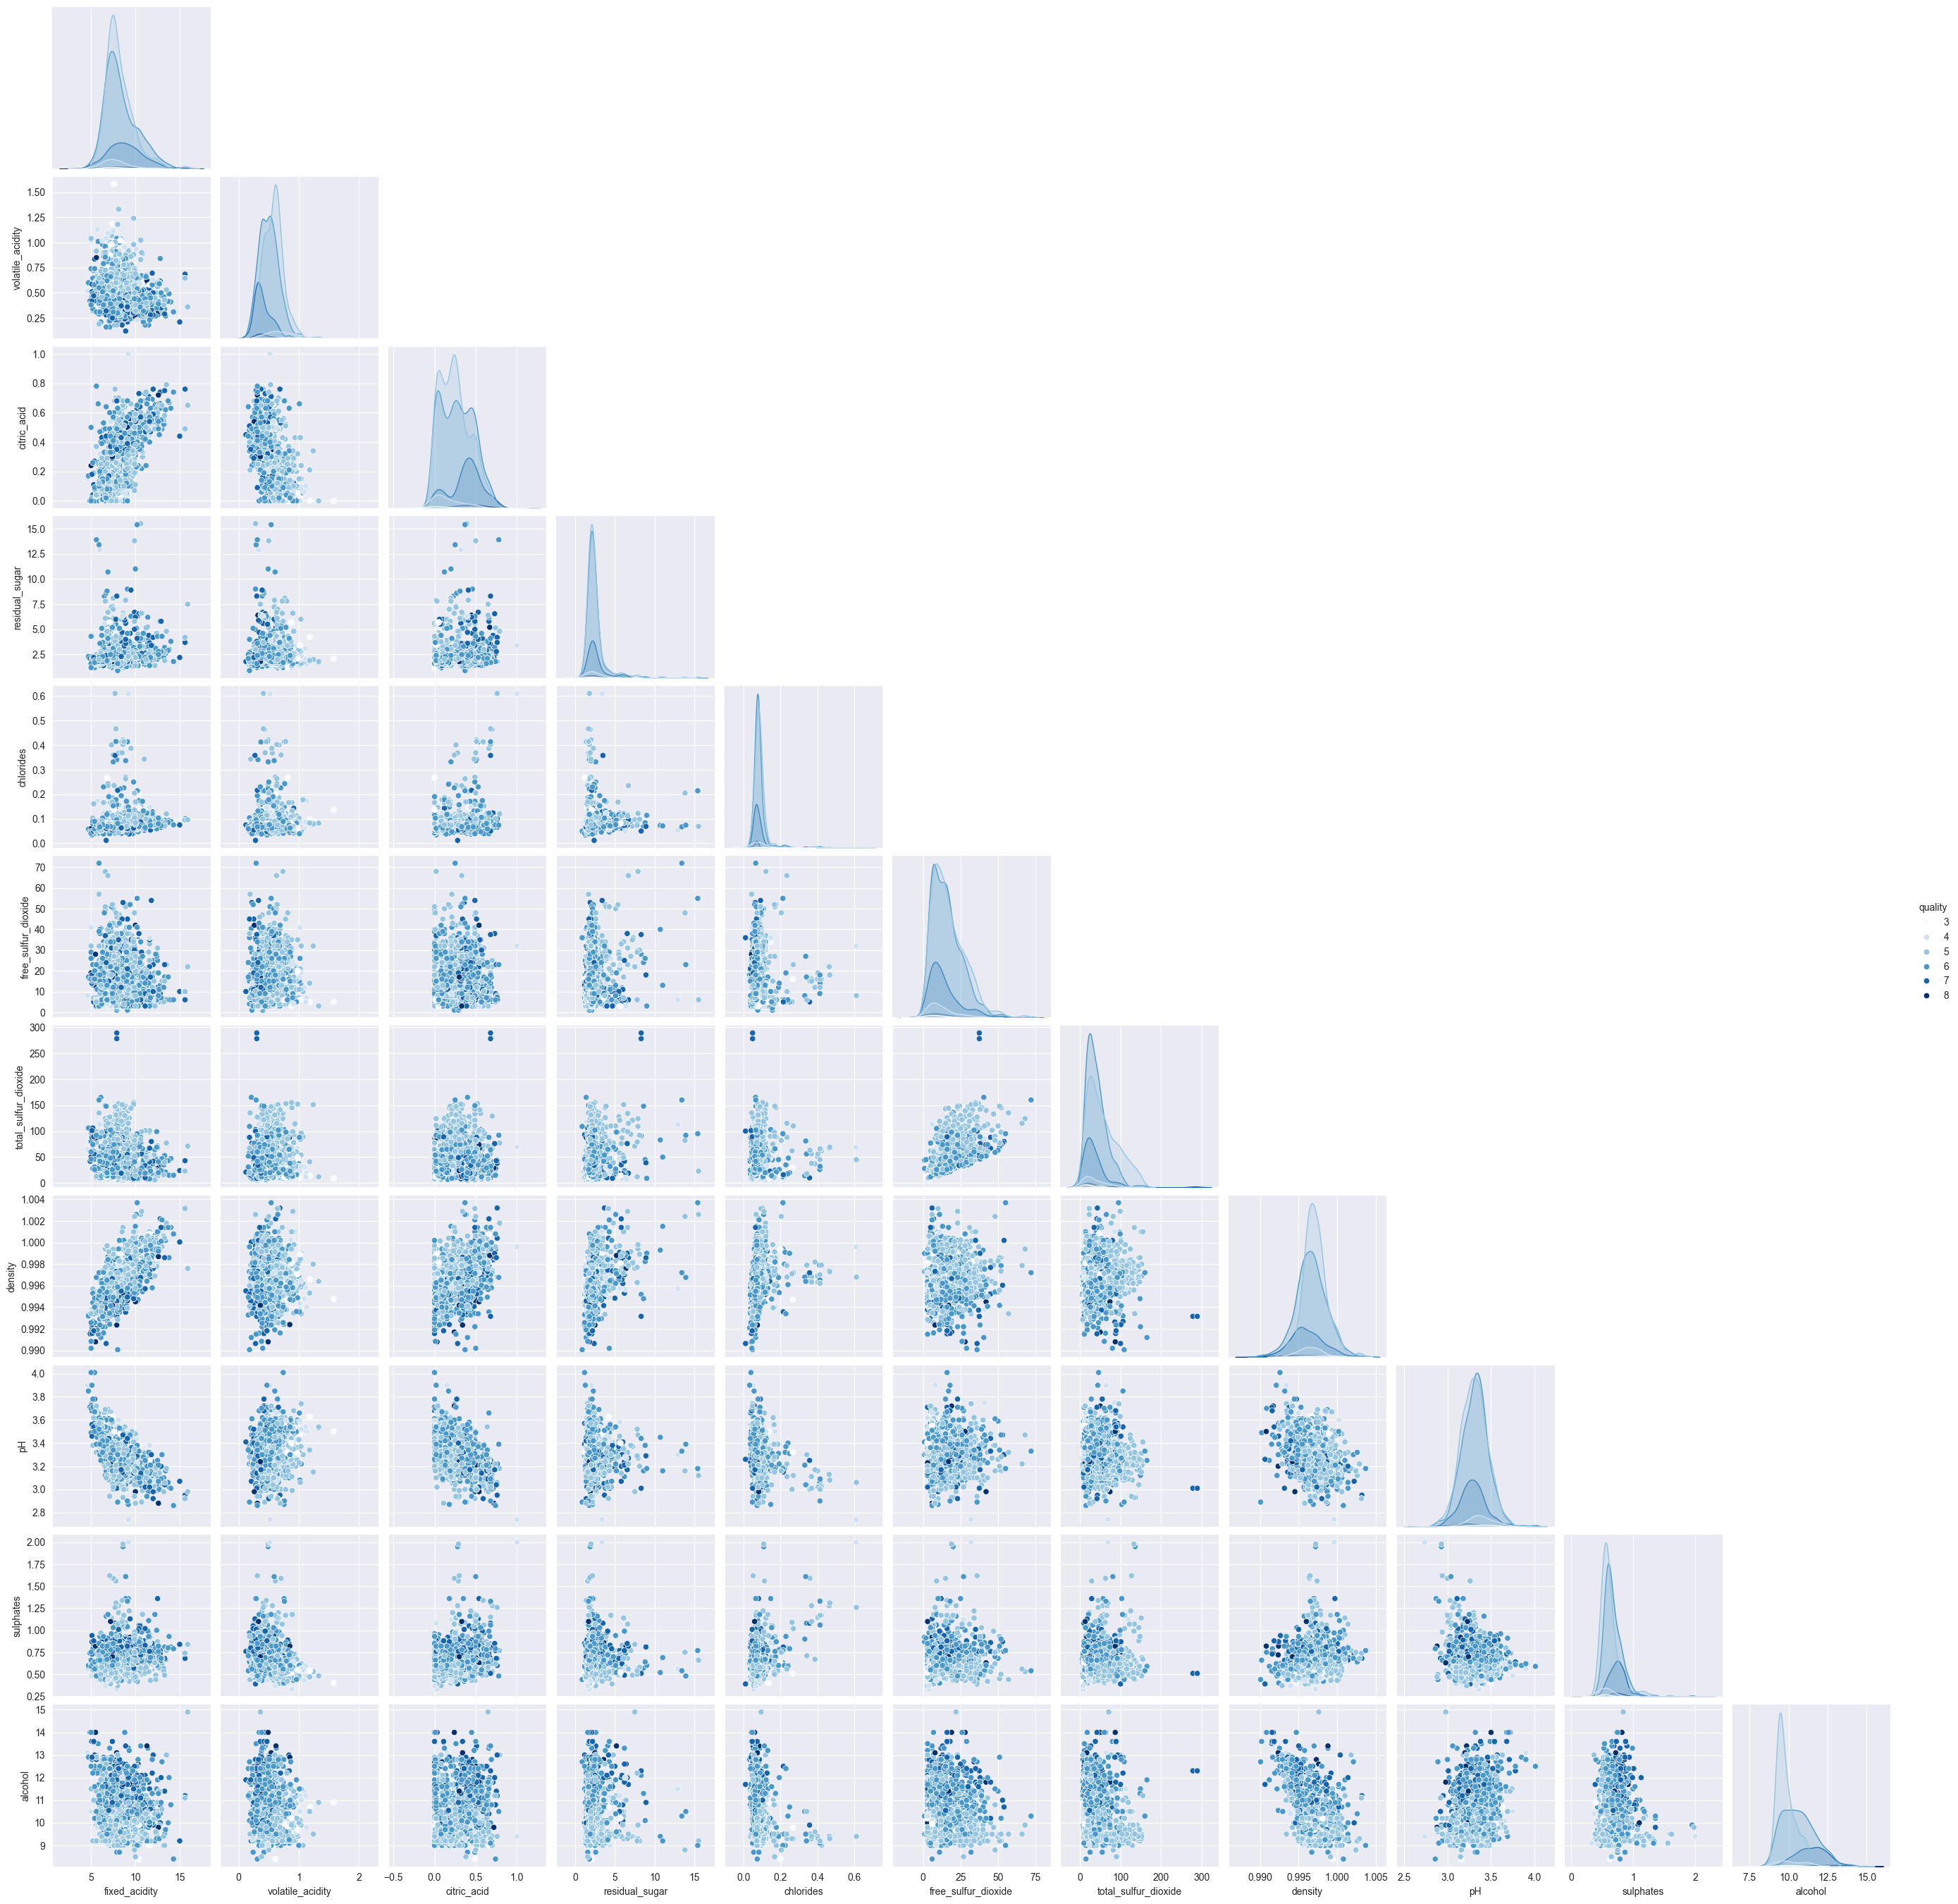

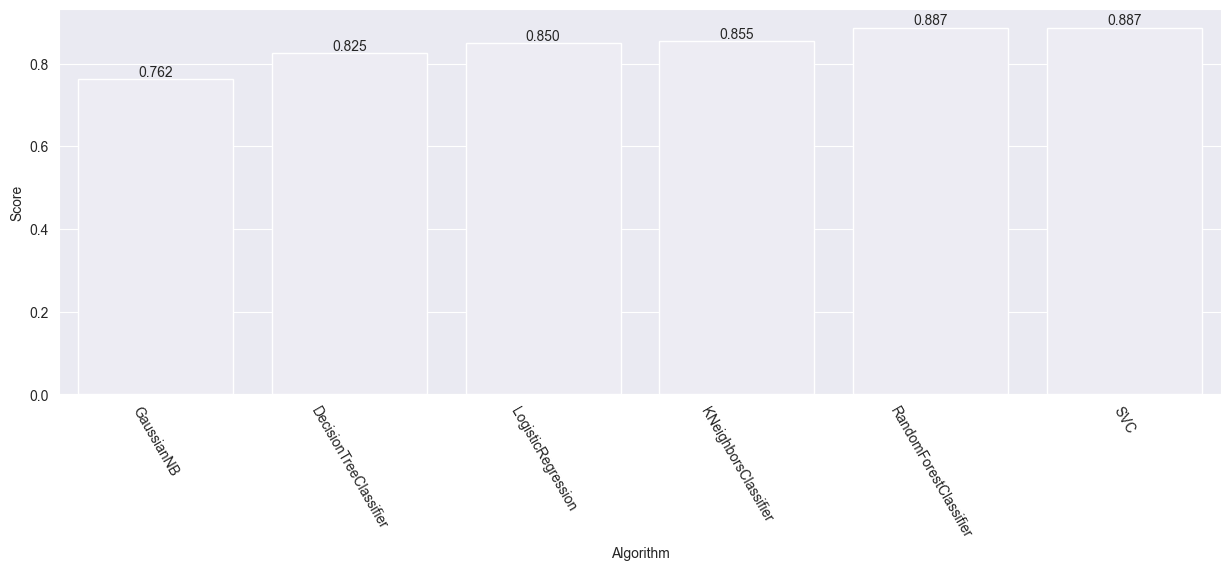

SVC(C=10, gamma=100)

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from termcolor import colored

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

pd.options.mode.copy_on_write = True # 启用 Pandas 的 Copy-on-Write 模式。这是一种优化内存使用的机制，只有在数据被修改时才会创建副本，而不是在赋值时立即复制。
sns.set_style('darkgrid') # 设置 Seaborn 的绘图风格为 'darkgrid'，即带有灰色背景和网格线的风格。'white'：白色背景，无网格线。◦ 'whitegrid'：白色背景，带网格线。◦ 'dark'：灰色背景，无网格线。◦ 'ticks'：白色背景，带刻度线。
warnings.filterwarnings('ignore') # Ignore warnings
pd.set_option('display.max_columns', None) # Setting this option will print all collumns of a dataframe
pd.set_option('display.max_colwidth', None) # Setting this option will print all of the data in a feature

# Import data by using pandas liblary and using read_csv method
data = pd.read_csv('winequality-red.csv')
data.head()
data.info()
data.describe().T.style.background_gradient(axis=0)
data.isna().sum()

# Rename columns to better recall them.
data.rename(columns = {"fixed acidity": "fixed_acidity",
                       "volatile acidity": "volatile_acidity",
                       "citric acid": "citric_acid",
                       "residual sugar": "residual_sugar",
                       "chlorides": "chlorides",
                       "free sulfur dioxide": "free_sulfur_dioxide",
                       "total sulfur dioxide": "total_sulfur_dioxide"},
            inplace = True)
# Create a list of DataFrame columns
columns = list(data.columns)

# fig, ax = plt.subplots(11, 2, figsize=(15, 45))
# plt.subplots_adjust(hspace = 0.5)
# for i in range(11) :
#     # AX 1
#     sns.boxplot(x=columns[i], data=data, ax=ax[i, 0],color="pink")
#     # Ax 2
#     sns.scatterplot(x=columns[i], y='quality', data=data, hue='quality', ax=ax[i, 1])

# corr = data.corr()
# # cmap = sns.diverging_palette(-1, 1, s=100, l=50, n=15, center="dark", as_cmap=True)
# plt.figure(figsize=(9, 6))
# sns.heatmap(corr, annot=True, fmt='.2f', linewidth=0.5, cmap='Purples', mask=np.triu(corr))
# plt.show()

sns.pairplot(data, hue='quality', corner = True, palette='Blues')

#Quality classes :
data.quality.unique()

data = data.replace({'quality' : {
                                    8 : 'Good',
                                    7 : 'Good',
                                    6 : 'Middle',
                                    5 : 'Middle',
                                    4 : 'Bad',
                                    3 : 'Bad',
        }}
)
data.head()

# Create X from DataFrame and y as Target
X_temp = data.drop(columns='quality')
y = data.quality

scaler = MinMaxScaler(feature_range=(0, 1)).fit_transform(X_temp)
X = pd.DataFrame(scaler, columns=X_temp.columns)
X.describe().T.style.background_gradient(axis=0, cmap='Blues')

# define a function to ploting Confusion matrix
def plot_confusion_matrix(y_test, y_prediction):
    '''Plotting Confusion Matrix'''
    cm = metrics.confusion_matrix(y_test, y_prediction)
    ax = plt.subplot()
    ax = sns.heatmap(cm, annot=True, fmt='', cmap="Purples")
    ax.set_xlabel('Prediced labels', fontsize=18)
    ax.set_ylabel('True labels', fontsize=18)
    ax.set_title('Confusion Matrix', fontsize=25)
    ax.xaxis.set_ticklabels(['Bad', 'Good', 'Middle'])
    ax.yaxis.set_ticklabels(['Bad', 'Good', 'Middle']) 
    plt.show()
# define a function to ploting Classification report
def clfr_plot(y_test, y_pred) :
    ''' Plotting Classification report'''
    cr = pd.DataFrame(metrics.classification_report(y_test, y_pred_rf, digits=3,
                                            output_dict=True)).T
    cr.drop(columns='support', inplace=True)
    sns.heatmap(cr, cmap='Purples', annot=True, linecolor='white', linewidths=0.5).xaxis.tick_top()
def clf_plot(y_pred) :
    '''
    1) Ploting Confusion Matrix
    2) Plotting Classification Report'''
    cm = metrics.confusion_matrix(y_test, y_pred)
    cr = pd.DataFrame(metrics.classification_report(y_test, y_pred, digits=3, output_dict=True)).T
    cr.drop(columns='support', inplace=True)
    
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    
    # Left AX : Confusion Matrix
    ax[0] = sns.heatmap(cm, annot=True, fmt='', cmap="Purples", ax=ax[0])
    ax[0].set_xlabel('Prediced labels', fontsize=18)
    ax[0].set_ylabel('True labels', fontsize=18)
    ax[0].set_title('Confusion Matrix', fontsize=25)
    ax[0].xaxis.set_ticklabels(['Bad', 'Good', 'Middle'])
    ax[0].yaxis.set_ticklabels(['Bad', 'Good', 'Middle'])
    
    # Right AX : Classification Report
    ax[1] = sns.heatmap(cr, cmap='Purples', annot=True, linecolor='white', linewidths=0.5, ax=ax[1])
    ax[1].xaxis.tick_top()
    ax[1].set_title('Classification Report', fontsize=25)
    plt.show()

data.quality.value_counts()

# Splite Dataframe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

#################################################################################
# #RandomForestClassifier
# # a dictionary to define parameters to test in algorithm
parameters = {
    'n_estimators' : [50, 150, 500],
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'max_features' : ['sqrt', 'log2']
}

rf = RandomForestClassifier(n_jobs=-1)
rf_cv = GridSearchCV(estimator=rf, cv=20, param_grid=parameters).fit(X_train, y_train)

print('Tuned hyper parameters : ', rf_cv.best_params_)
print('accuracy : ', rf_cv.best_score_)

# Model :
rf = RandomForestClassifier(**rf_cv.best_params_).fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

rf_score = round(rf.score(X_test, y_test), 3)
print('RandomForestClassifier score : ', rf_score)

y_test.value_counts()

# clf_plot(y_pred_rf)

#################################################################################
#LogisticRegression
# a dictionary to define parameters to test in algorithm
parameters = {
    'C' : [0.001, 0.01, 0.1, 1.0, 10, 100, 1000],
    'class_weight' : ['balanced'],
    'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}

lr = LogisticRegression()
lr_cv = GridSearchCV(estimator=lr, param_grid=parameters, cv=10).fit(X_train, y_train)

print('Tuned hyper parameters : ', lr_cv.best_params_)
print('accuracy : ', lr_cv.best_score_)

lr = LogisticRegression(**lr_cv.best_params_).fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

lr_score = round(lr.score(X_test, y_test), 3)
print('LogisticRegression score : ', lr_score)

# clf_plot(y_pred_lr)

#################################################################################
# #SVC
# # a dictionary to define parameters to test in algorithm
parameters = {
    'C' : [0.001, 0.01, 0.1, 1.0, 10, 100, 1000],
    'gamma' : [0.001, 0.01, 0.1, 1.0, 10, 100, 1000],
}



svc = SVC()
svc_cv = GridSearchCV(estimator=svc, param_grid=parameters, cv=10).fit(X_train, y_train)



print('Tuned hyper parameters : ', svc_cv.best_params_)
print('accuracy : ', svc_cv.best_score_)

# Model
svc = SVC(**svc_cv.best_params_).fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

svc_score = round(svc.score(X_test, y_test), 3)
print('SVC Score : ', svc_score)

# clf_plot(y_pred_svc)

#################################################################################
#DecisionTreeClassifier
# a dictionary to define parameters to test in algorithm
parameters = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'splitter' : ['best', 'random'],
    'max_depth' : list(np.arange(4, 30, 1))
        }



tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(estimator=tree, cv=10, param_grid=parameters).fit(X_train, y_train)



print('Tuned hyper parameters : ', tree_cv.best_params_)
print('accuracy : ', tree_cv.best_score_)

tree = DecisionTreeClassifier(**tree_cv.best_params_).fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

tree_score = round(tree.score(X_test, y_test), 3)
print('DecisionTreeClassifier Score : ', tree_score)

# clf_plot(y_pred_tree)

#################################################################################
#KNeighborsClassifier
# a dictionary to define parameters to test in algorithm
parameters = {
    'n_neighbors' : list(np.arange(3, 50, 2)),
    'weights': ['uniform', 'distance'],
    'p' : [1, 2, 3, 4]
}

knn = KNeighborsClassifier()
knn_cv = GridSearchCV(estimator=knn, cv=10, param_grid=parameters).fit(X_train, y_train)

print('Tuned hyper parameters : ', knn_cv.best_params_)
print('accuracy : ', knn_cv.best_score_)

knn = KNeighborsClassifier(**knn_cv.best_params_).fit(X_train, y_train)
y_pred_knn = knn_cv.predict(X_test)

knn_score = round(knn.score(X_test, y_test), 3)
print('KNeighborsClassifier Score :', knn_score)

# clf_plot(y_pred_knn)

#################################################################################
#GaussianNB
gnb = GaussianNB().fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
gnb_score = round(gnb.score(X_test, y_test), 3)
print('GNB Score :', gnb_score)

# clf_plot(y_pred_gnb)

#################################################################################
#Result
result = pd.DataFrame({
    'Algorithm' : ['RandomForestClassifier', 'LogisticRegression', 'SVC', 'DecisionTreeClassifier', 'KNeighborsClassifier', 'GaussianNB'],
    'Score' : [rf_score, lr_score, svc_score, tree_score, knn_score, gnb_score]
})

result.sort_values(by='Score', inplace=True)
sns.set_palette("Purples")
fig, ax = plt.subplots(1, 1, figsize=(15, 5))

sns.barplot(x='Algorithm', y='Score', data=result)
ax.bar_label(ax.containers[0], fmt='%.3f')
ax.set_xticklabels(labels=result.Algorithm, rotation=300)
plt.show()

# Model
svc = SVC(**svc_cv.best_params_)

svc.fit(X, y)

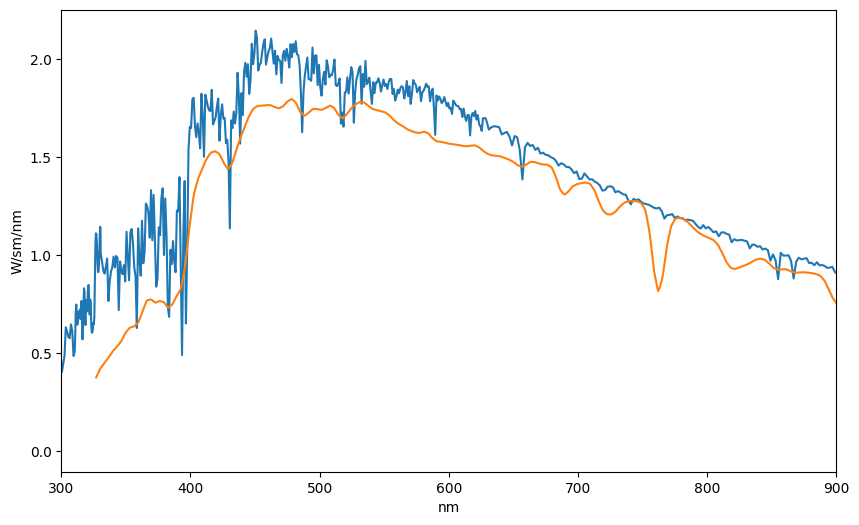

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# from scipy.signal import find_peaks
#%matplotlib inline

df = pd.read_excel("wehrli85.xlsx")
# df.info()

df1 = pd.read_excel("Ed.xlsx")
# 剔除包含 NaN 的行
df1 = df1.dropna()

# df1.info()
# df1.head(5)
x1 = df1["Wave"]
y1 = df1["Ed"]/500


# 滑动平均函数
def moving_average(data, window_size):
    window = np.ones(window_size) / window_size
    return np.convolve(data, window, mode="valid")

# # 计算局部波动（滑动窗口内的标准差）
# window_size = 5
# local_std = np.array([np.std(y1[i:i+window_size]) for i in range(len(y1) - window_size)])
# print("local_std",max(local_std))

# # 找到波动较大的点（局部标准差超过阈值）
# threshold = 0.08
# outliers = np.where(local_std > threshold)[0]
# print("outliers",outliers)

# 找到峰值
# peaks, _ = find_peaks(-y1, height=-0.8)  # height 参数用于设置峰值的最小高度
# print("peaks",x1[peaks],y1[peaks])

x = df["nm"]
y = df["W/sm/nm"]
# 计算滑动平均
window_size = 50
y_smooth = moving_average(y, window_size)
x_smooth = x[:len(y_smooth)]  # 调整 x 

#每隔两个取值
x_sample = x [::3]# 从第 0 个开始，每隔 2 个取一个
y_sample = y [::3]# 从第 0 个开始，每隔 2 个取一个
# print(x.head(5))
# print(x_sample.head(5))

fig = plt.figure(figsize = (10,6))
plt.xlim(300,900)
sns.lineplot(x = 'nm', y = 'W/sm/nm', data = df)
# sns.lineplot(x = x_smooth, y = y_smooth)
# sns.lineplot(x = x_sample,y = y_sample)
sns.lineplot(x = x1,y = y1)
# 标出波动较大的点
# sns.scatterplot(x=x1[outliers], y=y1[outliers], color="red", label=x1[outliers], s=100, edgecolor="black")
# 标出峰值
# sns.scatterplot(x=x1[peaks], y=y1[peaks], color="red", label="Peaks", s=100, edgecolor="black")
plt.show()



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 读取CSV文件，并将#NV替换为NaN
file_path = 'OPUS数据.xlsx'  # 替换为你的XLSL文件路径
df = pd.read_excel(file_path, na_values='#NV')

# 忽略第一列，第二列作为x轴（时间），后续列作为y轴
x = pd.to_datetime(df.iloc[:, 1])  # 将第二列转换为时间格式
y_columns = df.columns[2:]  # 获取第三列及以后的列名

# 创建子图
num_plots = len(y_columns)  # 子图数量
fig, axes = plt.subplots(num_plots, 1, figsize=(10, 6 * num_plots))  # 创建多个子图

# 如果只有一列数据，axes不是数组，需要转换为数组
if num_plots == 1:
    axes = [axes]

# 绘制每个子图
for i, column in enumerate(y_columns):
    ax = axes[i]
    ax.plot(x, df[column], label=column, marker='o', linestyle='-', markersize=5)  # 调整点的大小
    
    # 设置x轴为时间格式
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))  # 时间格式
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())  # 自动调整时间间隔
    ax.tick_params(axis='x', rotation=45)  # 旋转日期标签
    
    # 添加标题和标签
    ax.set_title(f'Time vs {column}')
    ax.set_xlabel('Time')
    ax.set_ylabel('Value')
    
    # 添加图例
    ax.legend()

# 调整子图间距
plt.tight_layout()

# 显示图形
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 读取CSV文件
df = pd.read_csv('melb_data.csv')
df.info()
y = df.Price
X = df.drop(['Price'], axis=1)
X = X.select_dtypes(exclude=['object'])

X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

0    1480000.0
1    1035000.0
2    1465000.0
3     850000.0
4    1600000.0
Name: Price, dtype: float64

In [ ]:
import math
from fractions import Fraction
# 计算组合数Cn
def combination(n, m):
    return math.factorial(n) / (math.factorial(m) * math.factorial(n - m))
# 计算排列数Pn
def permutation(n, m):
    return math.factorial(n) / math.factorial(n - m)

a = permutation(5, 5) #女生排列数为P(5,5)  
b = combination(4, 2) #10个位置选4个位置 
c = permutation(9, 9) #总排列数为P(10,10)
# 计算概率
probability = a * b / c
# 将概率转换为分数形式  
s = Fraction(probability).limit_denominator(1000)  # 分数化
print("概率为：", s,probability)  # 输出概率


120.0
